In [1]:
using PyPlot

## Constructing a phantom
* This is the input of our simulation

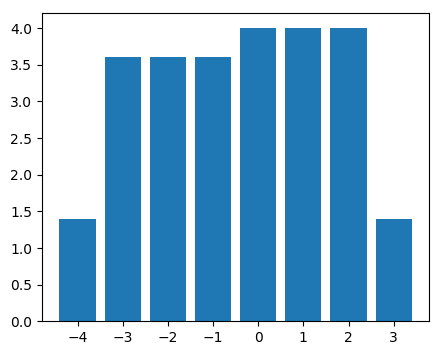

In [2]:
phantom = [1.4, 3.6, 3.6, 3.6, 4, 4, 4, 1.4]
location_label = -4:3 # in mm
x = location_label
fig = figure(figsize=(5,4));bar(location_label,phantom);

## A gradient-echo pulse sequence: without chemical-shift effect

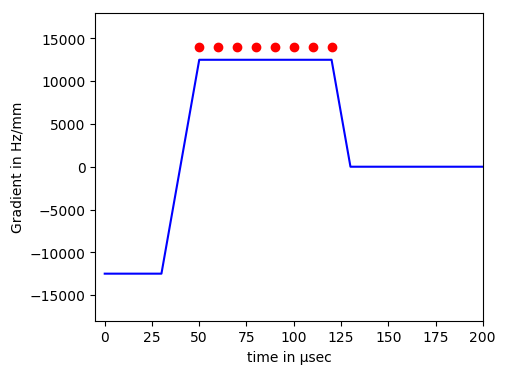

In [3]:
S = zeros(Complex{Float64},12)
μ = 1e-6
t =  [0,10,20,30,40,50,60,70,80,90,100,110,120]μ
i = complex(0,1)
Δω = 0 #Hz
T2 = 100e-3
G = 100000/8
RF180_time = 40μ;

timeAxis = 0:10:200
gradientStrength = zeros(size(timeAxis))
gradientStrength[1:4] = -G
gradientStrength[6:13] = G

ADC=[0,0,0,0,0,1,1,1,1,1,1,1,1]*14000
figure(figsize=(5,4)); plot(timeAxis, gradientStrength,"-b",timeAxis[6:13],ADC[6:13],"ro"); axis([-5,200,-18000,18000]); xlabel("time in μsec"); ylabel("Gradient in Hz/mm")
;

### How was the MR system prepared by the pulse sequence?
* pulse sequence and hardware dependent
* __subject independent__

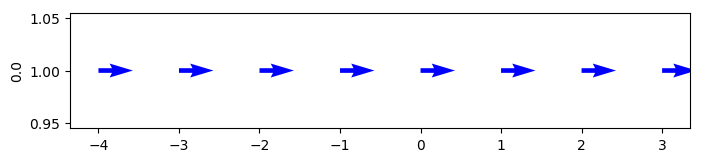

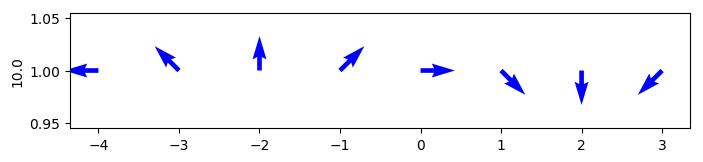

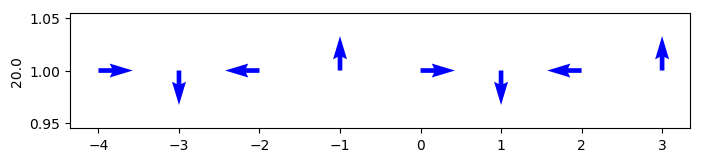

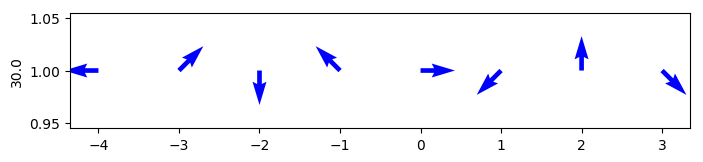

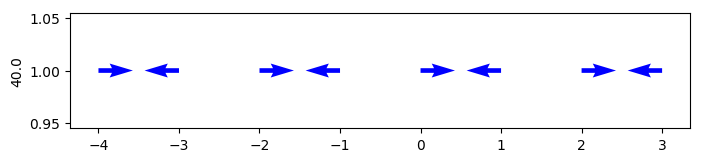

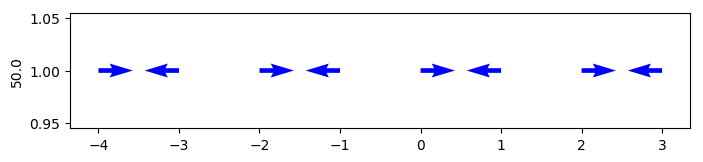

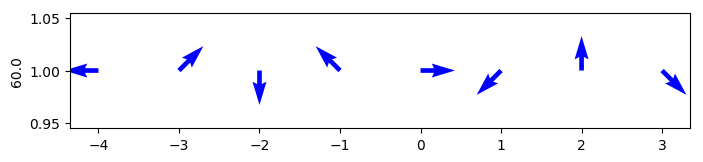

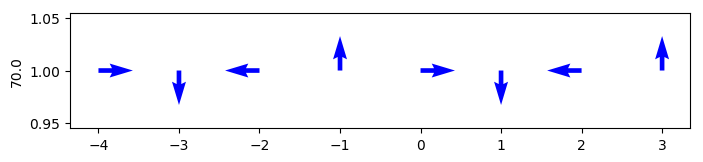

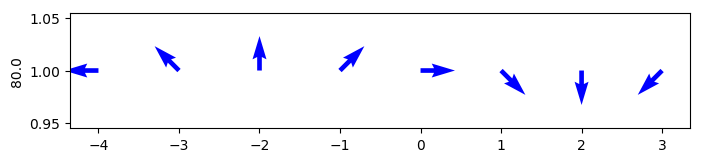

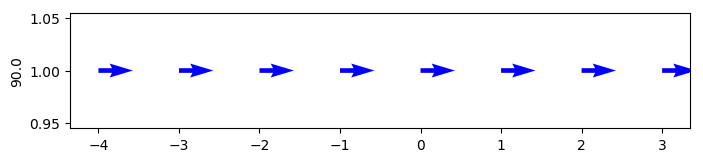

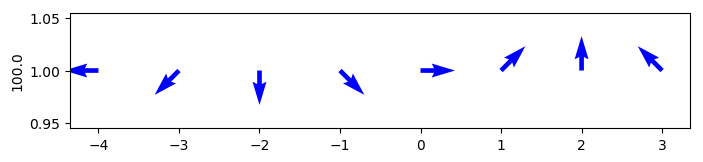

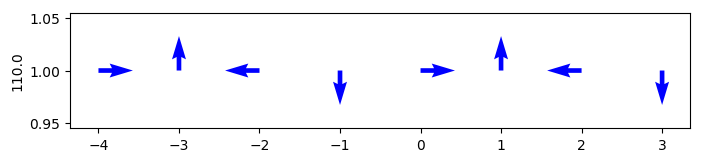

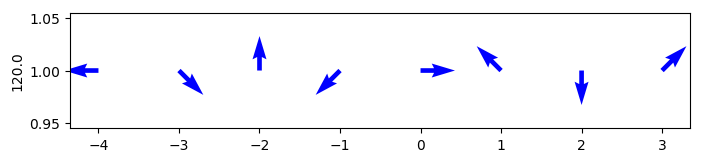

In [4]:
S = zeros(Complex{Float64},13)
time_increment = 10μ
phase_value = zeros(size(x));
for count = 1:13
    show_0μsec = exp.(i*phase_value); 
    figure(count,figsize=(8,1.5));quiver(-4:3, ones(8), real(show_0μsec), imag(show_0μsec), color="blue");ylabel(t[count]/μ)
    S[count] = sum(phantom.*show_0μsec.*exp(-t[count]/T2))
    phase_increment = 2*π*gradientStrength[count]*time_increment.*x + 2*π*Δω*time_increment;
    phase_value = phase_value + phase_increment;
end

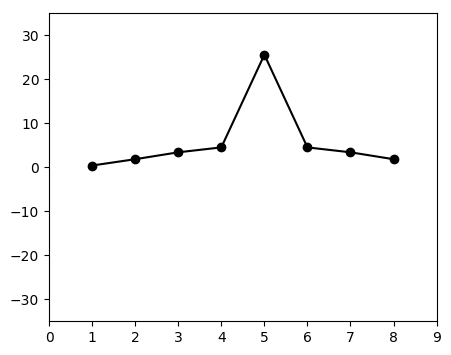

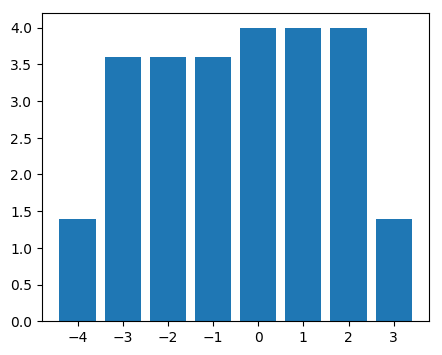

In [5]:
S_adc = S[6:13]
fig = figure(figsize=(5,4)); plot(1:8,abs.(S_adc),"-ko");axis([0,9,-35,35]);
reconstructedData = abs.(fftshift(fft(fftshift(S_adc))))/8;
fig = figure(figsize=(5,4)); bar(location_label,reconstructedData);

## A gradient-echo pulse sequence: with chemical-shift effect

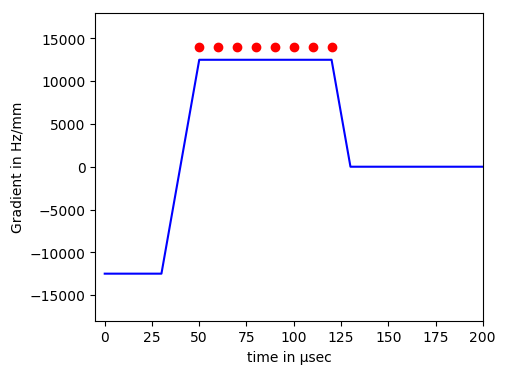

In [6]:
S = zeros(Complex{Float64},12)
μ = 1e-6
t =  [0,10,20,30,40,50,60,70,80,90,100,110,120]μ
i = complex(0,1)
Δω = 2500 #Hz
T2 = 100e-3
G = 100000/8
RF180_time = 40μ;

timeAxis = 0:10:200
gradientStrength = zeros(size(timeAxis))
gradientStrength[1:4] = -G
gradientStrength[6:13] = G

ADC=[0,0,0,0,0,1,1,1,1,1,1,1,1]*14000
figure(figsize=(5,4)); plot(timeAxis, gradientStrength,"-b",timeAxis[6:13],ADC[6:13],"ro"); axis([-5,200,-18000,18000]); xlabel("time in μsec"); ylabel("Gradient in Hz/mm")
;

### How was the MR system prepared by the pulse sequence?
* pulse sequence and hardware dependent
* __subject independent__

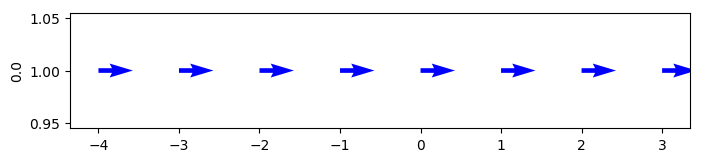

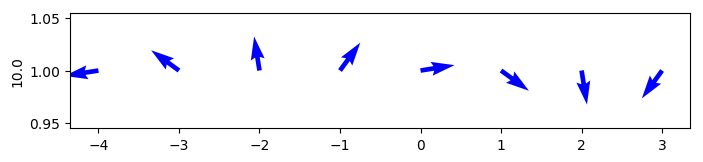

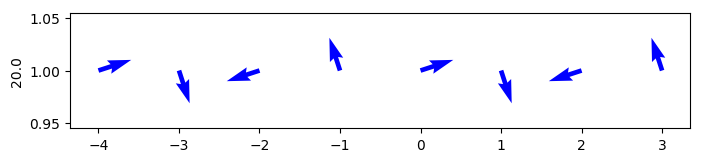

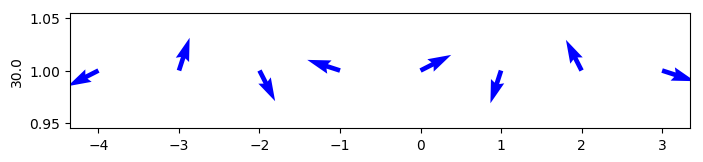

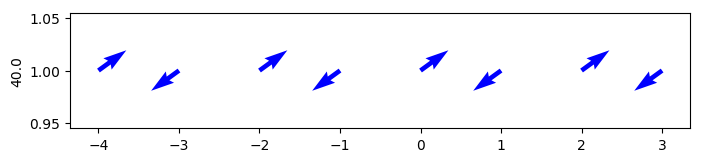

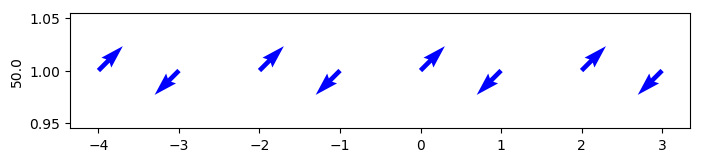

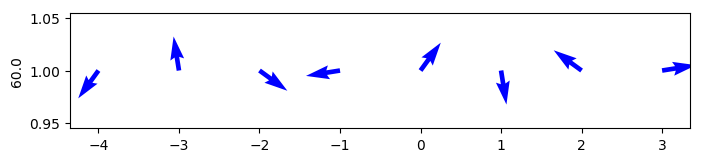

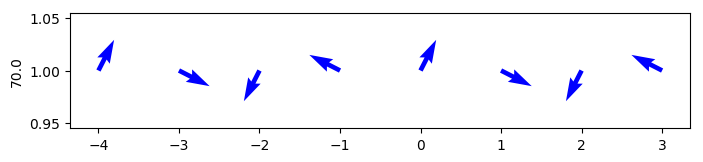

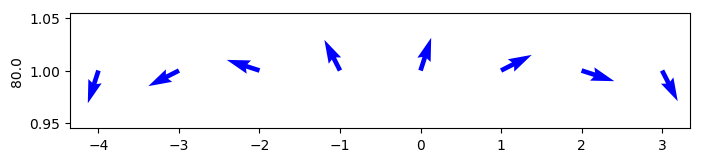

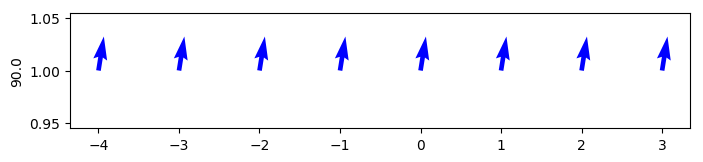

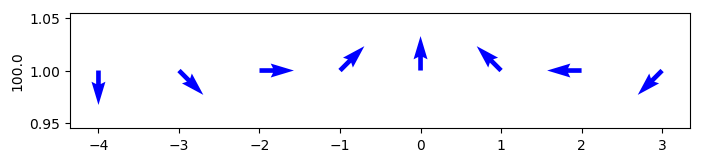

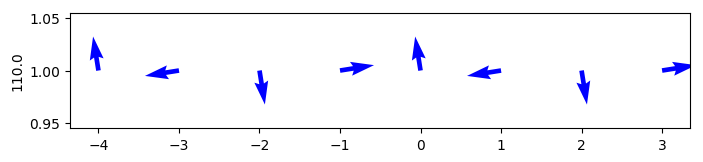

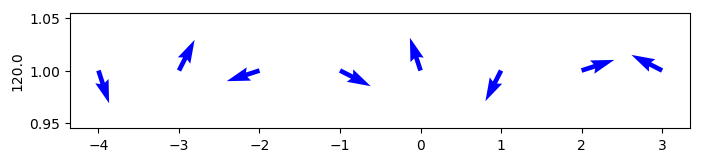

In [7]:
S = zeros(Complex{Float64},13)
time_increment = 10μ
phase_value = zeros(size(x));
for count = 1:13
    show_0μsec = exp.(i*phase_value); 
    figure(count,figsize=(8,1.5));quiver(-4:3, ones(8), real(show_0μsec), imag(show_0μsec), color="blue");ylabel(t[count]/μ)
    S[count] = sum(phantom.*show_0μsec.*exp(-t[count]/T2))
    phase_increment = 2*π*gradientStrength[count]*time_increment.*x + 2*π*Δω*time_increment;
    phase_value = phase_value + phase_increment;
end

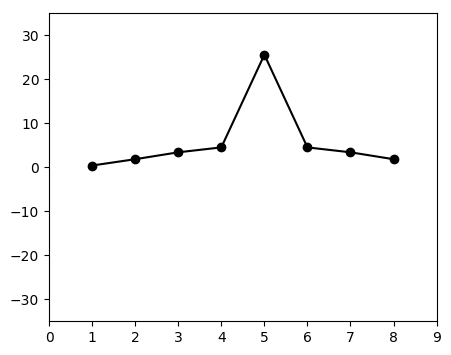

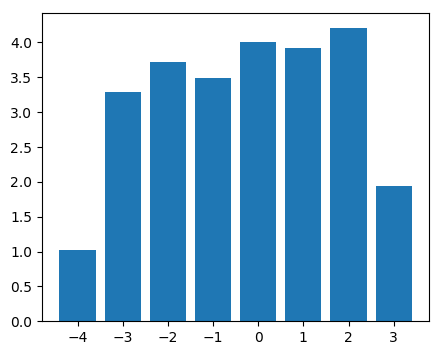

In [8]:
S_adc = S[6:13]
fig = figure(figsize=(5,4)); plot(1:8,abs.(S_adc),"-ko");axis([0,9,-35,35]);
reconstructedData = abs.(fftshift(fft(fftshift(S_adc))))/8;
fig = figure(figsize=(5,4)); bar(location_label,reconstructedData);

## A spin-echo pulse sequence: without chemical-shift effect

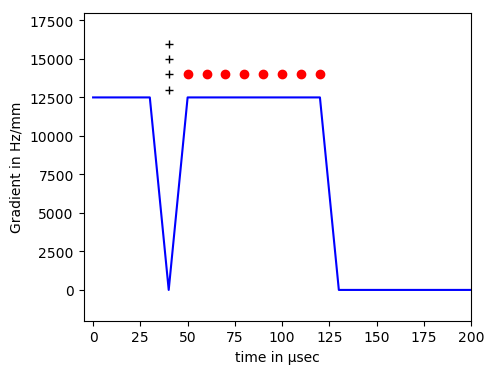

In [9]:
S = zeros(Complex{Float64},12)
μ = 1e-6
t =  [0,10,20,30,40,50,60,70,80,90,100,110,120]μ
i = complex(0,1)
Δω = 0 #Hz
T2 = 100e-3
G = 100000/8
RF180_time = 40μ;

timeAxis = 0:10:200
gradientStrength = zeros(size(timeAxis))
gradientStrength[1:4] = G
gradientStrength[6:13] = G

ADC=[0,0,0,0,0,1,1,1,1,1,1,1,1]*14000
figure(figsize=(5,4)); plot(timeAxis, gradientStrength,"-b",timeAxis[6:13],ADC[6:13],"ro",RF180_time/μ,16000,"k+",RF180_time/μ,15000,"k+",RF180_time/μ,14000,"k+",RF180_time/μ,13000,"k+"); axis([-5,200,-2000,18000]); xlabel("time in μsec"); ylabel("Gradient in Hz/mm")
;

### How was the MR system prepared by the pulse sequence?
* pulse sequence and hardware dependent
* __subject independent__

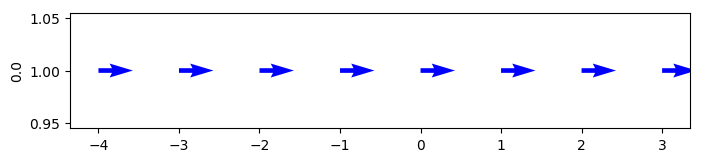

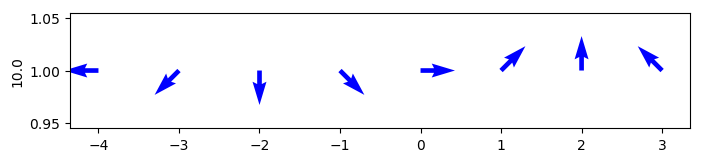

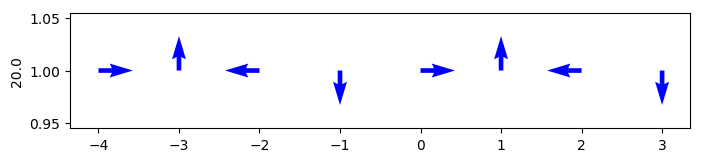

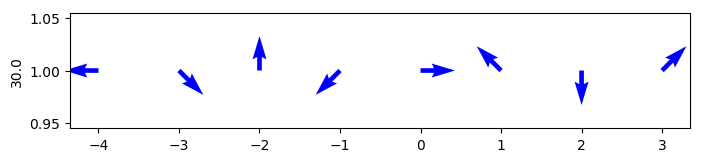

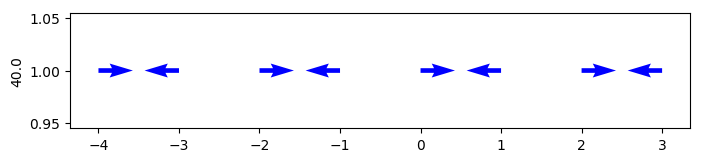

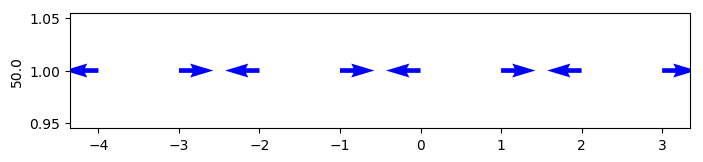

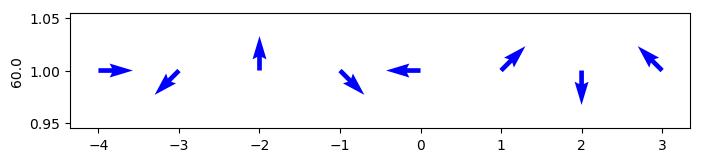

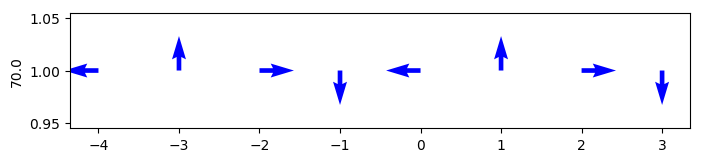

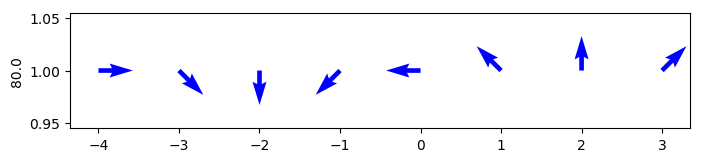

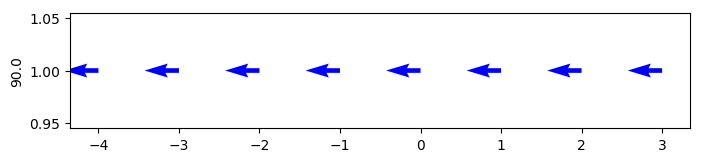

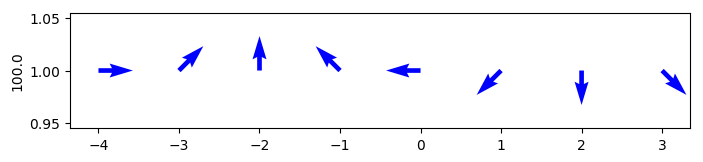

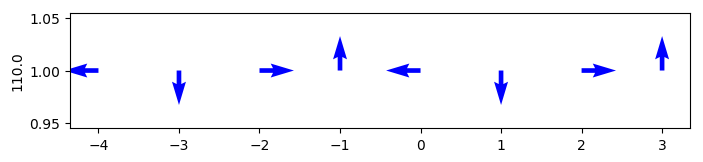

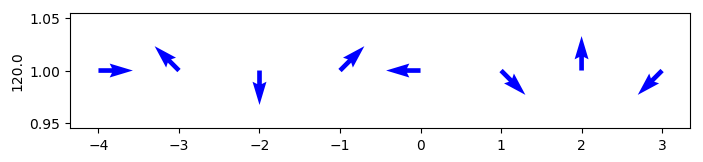

In [10]:
flip_along_x(θ) = -θ;
flip_along_y(θ) = -(θ+(π/2))-(π/2);
S = zeros(Complex{Float64},13)
time_increment = 10μ
phase_value = zeros(size(x));
for count = 1:13
    show_0μsec = exp.(i*phase_value); 
    figure(count,figsize=(8,1.5));quiver(-4:3, ones(8), real(show_0μsec), imag(show_0μsec), color="blue");ylabel(t[count]/μ)
    S[count] = sum(phantom.*show_0μsec.*exp(-t[count]/T2))
    phase_increment = 2*π*gradientStrength[count]*time_increment.*x + 2*π*Δω*time_increment;
    if count == 5
        phase_value = flip_along_y(phase_value);
    end
    phase_value = phase_value + phase_increment;
end

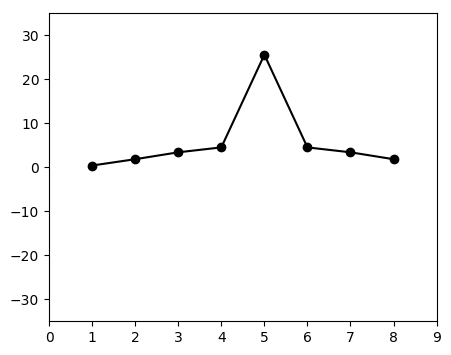

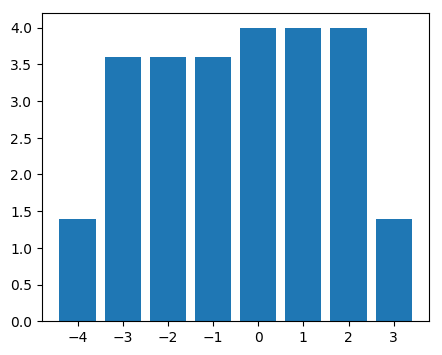

In [11]:
S_adc = S[6:13]
fig = figure(figsize=(5,4)); plot(1:8,abs.(S_adc),"-ko");axis([0,9,-35,35]);
reconstructedData = abs.(fftshift(fft(fftshift(S_adc))))/8;
fig = figure(figsize=(5,4)); bar(location_label,reconstructedData);

## A spin-echo pulse sequence: with chemical-shift effect

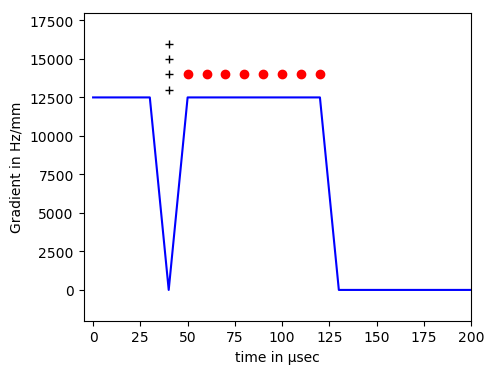

In [12]:
S = zeros(Complex{Float64},12)
μ = 1e-6
t =  [0,10,20,30,40,50,60,70,80,90,100,110,120]μ
i = complex(0,1)
Δω = 2500 #Hz
T2 = 100e-3
G = 100000/8
RF180_time = 40μ;

timeAxis = 0:10:200
gradientStrength = zeros(size(timeAxis))
gradientStrength[1:4] = G
gradientStrength[6:13] = G

ADC=[0,0,0,0,0,1,1,1,1,1,1,1,1]*14000
figure(figsize=(5,4)); plot(timeAxis, gradientStrength,"-b",timeAxis[6:13],ADC[6:13],"ro",RF180_time/μ,16000,"k+",RF180_time/μ,15000,"k+",RF180_time/μ,14000,"k+",RF180_time/μ,13000,"k+"); axis([-5,200,-2000,18000]); xlabel("time in μsec"); ylabel("Gradient in Hz/mm")
;

### How was the MR system prepared by the pulse sequence?
* pulse sequence and hardware dependent
* __subject independent__

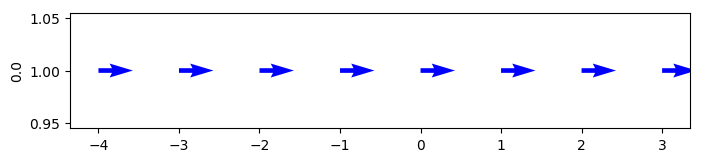

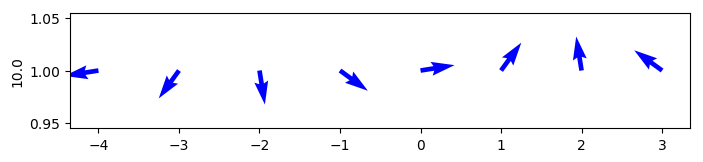

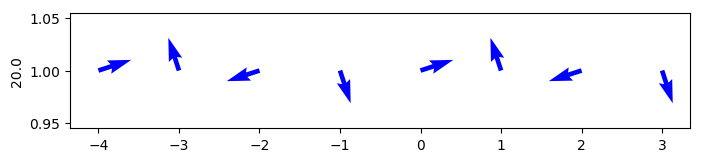

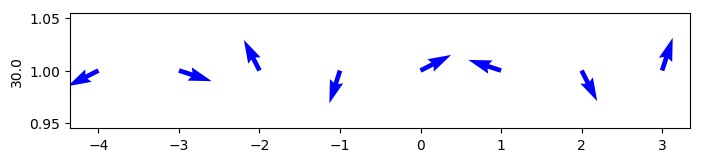

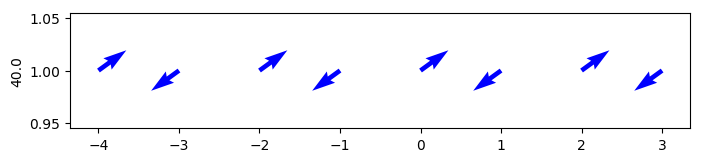

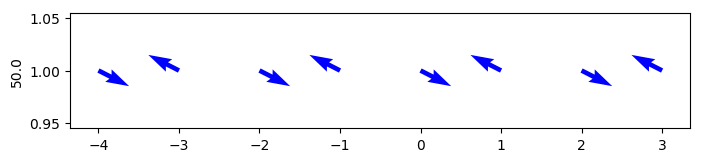

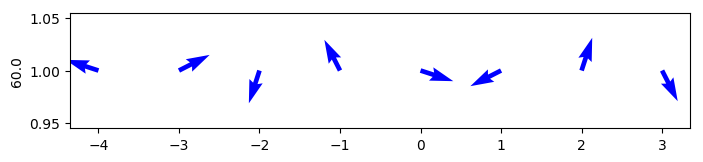

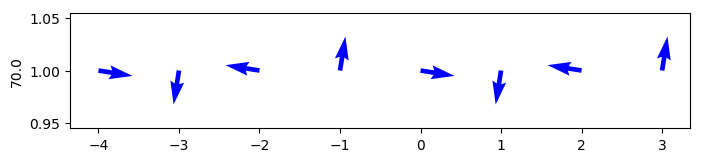

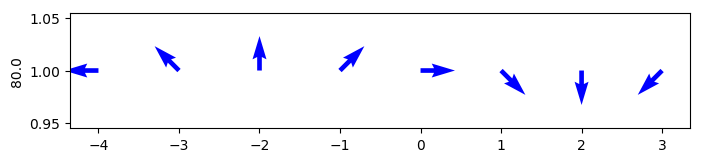

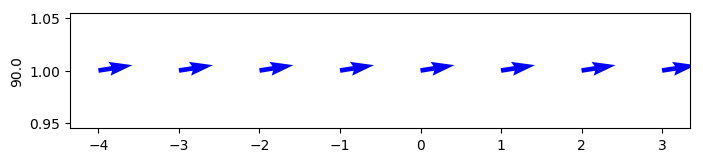

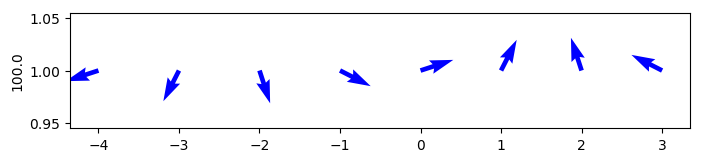

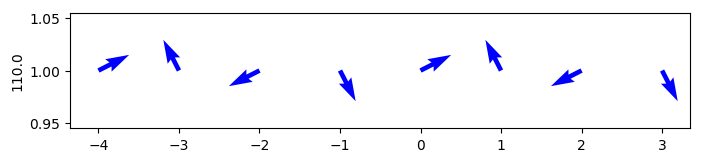

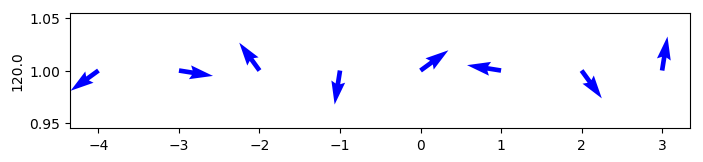

In [13]:
flip_along_x(θ) = -θ;
flip_along_y(θ) = -(θ+(π/2))-(π/2);
S = zeros(Complex{Float64},13)
time_increment = 10μ
phase_value = zeros(size(x));
for count = 1:13
    show_0μsec = exp.(i*phase_value); 
    figure(count,figsize=(8,1.5));quiver(-4:3, ones(8), real(show_0μsec), imag(show_0μsec), color="blue");ylabel(t[count]/μ)
    S[count] = sum(phantom.*show_0μsec.*exp(-t[count]/T2))
    phase_increment = 2*π*gradientStrength[count]*time_increment.*x + 2*π*Δω*time_increment;
    if count == 5
        phase_value = flip_along_x(phase_value);
    end
    phase_value = phase_value + phase_increment;
end

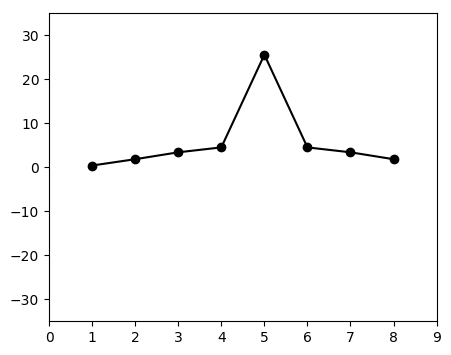

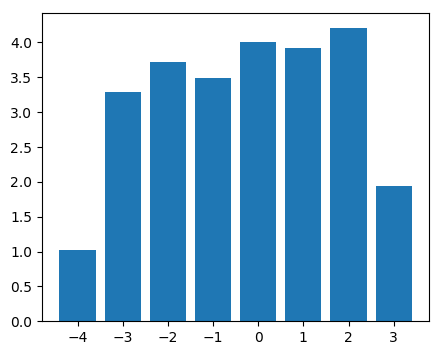

In [14]:
S_adc = S[6:13]
fig = figure(figsize=(5,4)); plot(1:8,abs.(S_adc),"-ko");axis([0,9,-35,35]);
reconstructedData = abs.(fftshift(fft(fftshift(S_adc))))/8;
fig = figure(figsize=(5,4)); bar(location_label,reconstructedData);